In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

In [2]:
np.random.seed(42)

# Generate data with multicollinearity
n_samples = 200
X1 = np.random.rand(n_samples) * 100  # Feature 1
X2 = X1 + (np.random.rand(n_samples) * 10)  # Feature 2 (highly correlated with Feature 1)
X3 = np.random.rand(n_samples) * 50  # Feature 3 (less correlated)
noise = np.random.randn(n_samples) * 5  # Noise term

# Target variable with some weights
Y = 3 * X1 + 2 * X2 + 0.5 * X3 + noise

In [3]:
# Create a DataFrame
data = pd.DataFrame({
    'Feature1': X1,
    'Feature2': X2,
    'Feature3': X3,
    'Target': Y
})

In [6]:
data

,Feature1,Feature2,Feature3,Target
0,37.454012,43.874328,5.156193,200.037501
1,95.071431,95.912830,45.127645,495.639411
2,73.199394,74.815681,25.262619,381.325703
3,59.865848,68.851390,41.322873,332.785551
4,15.601864,21.666155,16.002480,95.370895
...,...,...,...,...
195,34.920957,44.228531,23.698082,208.550007
196,72.595568,81.179695,33.377887,406.079818
197,89.711026,94.000966,8.615994,467.075832
198,88.708642,96.217353,9.614451,462.023416


In [9]:
X = data.drop(columns=['Target'])
Y = data['Target']

In [10]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=42)

# Ridge regression

In [13]:
from sklearn.linear_model import Ridge
# to find value of alpha use GridSearchCV
from sklearn.model_selection import GridSearchCV

alpha_values =[0.01,0.1,1.0,10,20,30,50]

param_grid ={'alpha':alpha_values}
ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, Y_train)

print("Best alpha:", grid_search.best_params_['alpha'])

# Evaluate on test set
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, Y_test)  # Use R² or other metrics
print("Test set score:", test_score)

Best alpha: 50
Test set score: 0.9992117919416328


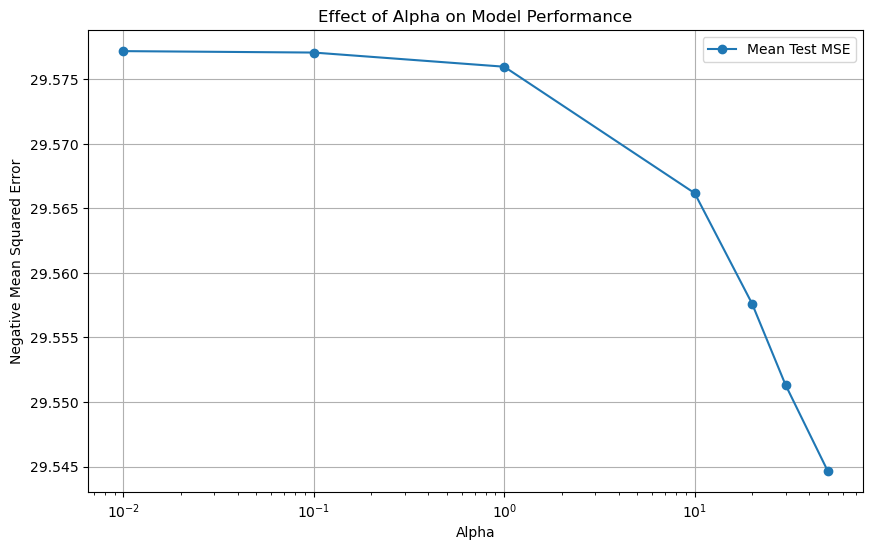

In [14]:
results = grid_search.cv_results_
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, -results['mean_test_score'], marker='o', label='Mean Test MSE')
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Squared Error')
plt.title('Effect of Alpha on Model Performance')
plt.xscale('log')
plt.legend()
plt.grid()
plt.show()